
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [9]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for providing plotting functionalities in matplotlib library
from matplotlib import pyplot as plt # used for creating plots and visualization
import pylab # used for enhanced plotting functionalities and simplified data manipulation
import pingouin as pg # used for statistical analysis and hypothesis testing

# Read data from the CSV file 'MillerHadenData.csv' and load it into a Pandas DataFrame named df_mh
df_mh = pd.read_csv('data for A1/MillerHadenData.csv')

In [10]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info())

   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB
None


In [14]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())

# Check whether there is a data point for each participant on both variables
print(df_mh[['Abil', 'IQ']].count())

Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
Abil    25
IQ      25
dtype: int64


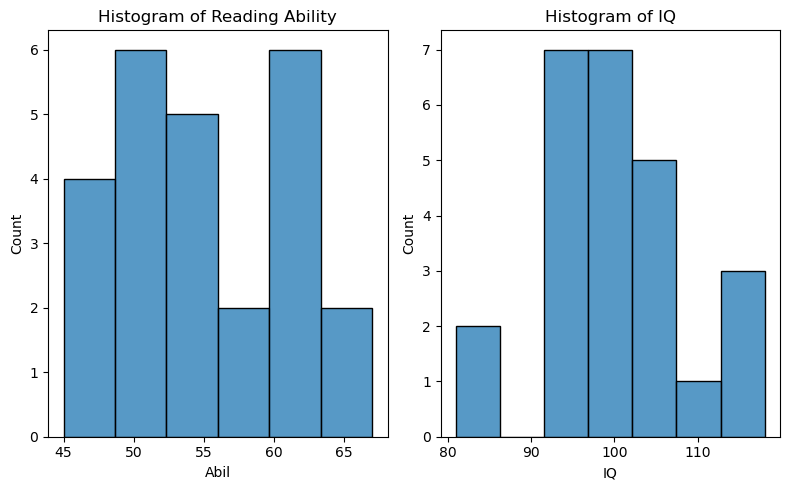

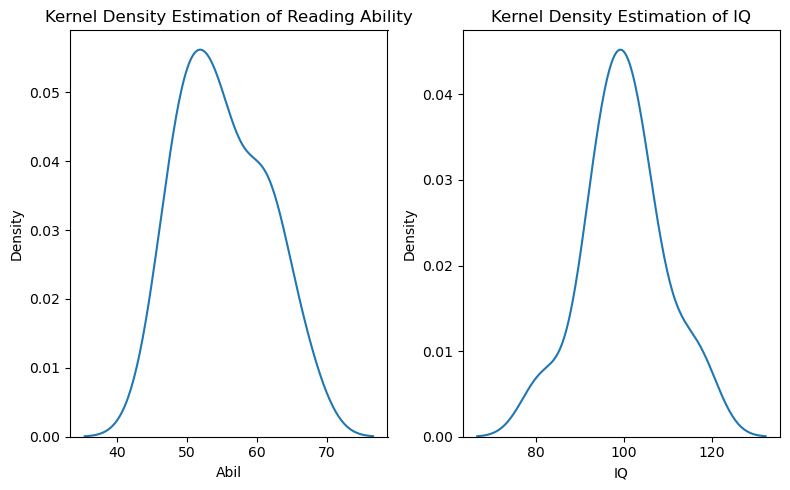

In [16]:
# Q1c (code):
# Check data distribution

# Method 1, using histogram
# Set the size
plt.figure(figsize=(8, 5))
#Plot a histogram of Reading Ability
plt.subplot(1, 2, 1) # '(1, 2, 1)' means creating a subgraph grid with 1 row and 2 columns, and selects the first subgraph to draw
sns.histplot(df_mh['Abil'])
plt.title('Histogram of Reading Ability')
# Plot a histogram of IQ
plt.subplot(1, 2, 2) # '(1, 2, 2)' means selecting the second subgraph to draw
sns.histplot(df_mh['IQ'])
plt.title('Histogram of IQ')
# Adjust subgraph layout
plt.tight_layout()
# Display graphics
plt.show()

# Method 2, using Kernel Density Estimation, KDE
# Set the size
plt.figure(figsize=(8, 5))
#Plot a curve of KDE of Reading Ability
plt.subplot(1, 2, 1)
sns.kdeplot(df_mh['Abil'])
plt.title('Kernel Density Estimation of Reading Ability')
#Plot a curve of KDE of IQ
plt.subplot(1, 2, 2)
sns.kdeplot(df_mh['IQ'])
plt.title('Kernel Density Estimation of IQ')
# Adjust subgraph layout
plt.tight_layout()
# Display graphics
plt.show()

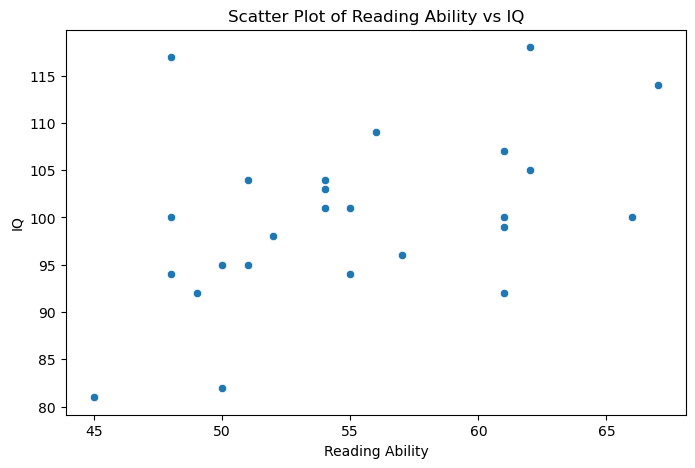

In [17]:
# Q1d (code):
# Scatter plot

# Set the size
plt.figure(figsize=(8, 5))

# Create a scatter plot with Reading Ability as x-axis and IQ as y-axis
sns.scatterplot(x='Abil', y='IQ', data=df_mh)

# Add labels to the axes
plt.xlabel('Reading Ability')
plt.ylabel('IQ')

# Add a title to the plot
plt.title('Scatter Plot of Reading Ability vs IQ')

# Show the plot
plt.show()

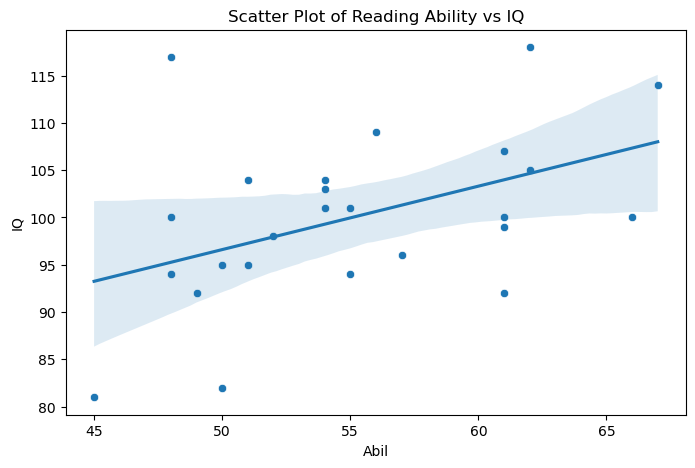

In [18]:
# Q1e (code):
# Correlation line

# Set the size
plt.figure(figsize=(8, 5))

# Create a scatter plot with Reading Ability as x-axis and IQ as y-axis
sns.scatterplot(x='Abil', y='IQ', data=df_mh)

# Add labels to the axes
plt.xlabel('Reading Ability')
plt.ylabel('IQ')

# Add a title to the plot
plt.title('Scatter Plot of Reading Ability vs IQ')

# Add a correlation line
sns.regplot(x='Abil', y='IQ', data=df_mh, scatter=False)

# Show the plot
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [ ]:
# Q2a (answer with words):
# Using Pearson is more reasonable, due to the flowing reasons:
# Firstly, the KDE plots of both 'Abil' (Reading Ability) and 'IQ' suggest approximately normal distribution
# Secondly, The scatter plot of Reading Ability vs IQ exhibits, indicats a positive linear relationship
# Given the observed patterns, we can use the Pearson correlation coefficient test, as it is suitable for linear relationships and assumes normal or symmetric distributions.

In [21]:
# Q2b (code):

# Calculate Pearson correlation coefficient and associated p-values
pearson_corr_result = pg.corr(df_mh['Abil'], df_mh['IQ'], method='pearson')

# Calculate Spearman correlation coefficient and associated p-values
spearman_corr_result = pg.corr(df_mh['Abil'], df_mh['IQ'], method='spearman')

# Extract correlation coefficients and p-values
# For Pearson correlation
pearson_corr, p_value_pearson_corr = pearson_corr_result['r'][0], pearson_corr_result['p-val'][0]
# For Spearman correlation
spearman_corr, p_value_spearman_corr = spearman_corr_result['r'][0], spearman_corr_result['p-val'][0]

# Display the results
print(f"Pearson correlation coefficient: {pearson_corr:.3f}, p-value: {p_value_pearson_corr:.3f}")
print(f"Spearman correlation coefficient: {spearman_corr:.3f}, p-value: {p_value_spearman_corr:.3f}")

Pearson correlation coefficient: 0.451, p-value: 0.024
Spearman correlation coefficient: 0.441, p-value: 0.027


In [ ]:
# Q2c (answer with words):
# The interpretation of the results reveals a significant positive correlation 
# between the variables "Abil" and "IQ". Both the Pearson and Spearman correlation 
# coefficients, at 0.451 and 0.441 respectively, signify a moderate strength of 
# association. This implies that as "Abil" scores increase, there tends to be 
# a corresponding increase in "IQ" scores, and vice versa. The statistical significance 
# of the p-values (0.024 and 0.027) adds weight to this conclusion, indicating 
# that this relationship is unlikely to have arisen by chance. Therefore, it can 
# be reasonably inferred that individuals with higher "Abil" scores are more likely 
# to exhibit higher "IQ" scores, and vice versa, with a moderate level of certainty.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [ ]:
# Q3a (answer in words):
# H0: There is no significant difference in weekly home reading time between individuals with low and high reading abilities.
# H1: There is a significant difference in weekly home reading time between individuals with low and high reading abilities.

In [22]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  #used for handling and analyzing data
from scipy.stats import chi2_contingency #used for performing chi-square test

# Define the rounded average for Reading Ability and Home
rounded_avg_abil = df_mh['Abil'].mean().round()
rounded_avg_home = df_mh['Home'].mean().round()

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'Low' if x <= rounded_avg_abil else 'High')

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Infrequent' if x <= rounded_avg_home else 'Frequent')

In [23]:
# Q3c (code):
# Construct Contingency Matrix
contingency_table = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
print(contingency_table)

Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [24]:
# Q3d (code):
# Perform the Chi-square test
chi_square_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi_square_statistic}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 6.500270562770561
P-value: 0.010785807794066234
Degrees of freedom: 1
Expected frequencies:
[[4.4 5.6]
 [6.6 8.4]]


In [ ]:
# Q3e (answer in words):
# The Chi-square test yielded a chi-square statistic of approximately 6.50, with 1 degree of freedom and a p-value of about 0.011.
# Since the p-value is less than the typical significance level of 0.05, we reject the null hypothesis. 
# This indicates a significant association between reading ability and weekly home reading time.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [27]:

import pandas as pd # used for data manipulation and analysis
from scipy import stats # used forstatistical analysis
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization and basic plotting
import seaborn as sns # for data visualization

# Load the data
df_evaluators = pd.read_csv('data for A1/evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [29]:
# Q4a (code):
# Calculate mean and standard deviation for age
age_mean = df_evaluators['age'].mean()
age_std = df_evaluators['age'].std()

age_mean, age_std

(30.852941176470587, 6.238358141327351)

In [30]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = df_evaluators[df_evaluators['sex'] == 1].shape[0]
female_count = df_evaluators[df_evaluators['sex'] == 2].shape[0]

male_count, female_count

(4, 30)

###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [32]:
# Load ratings data
df_ratings = pd.read_csv('data for A1/ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [33]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [ ]:
# Q6a (answer in words):
# Null hypothesis: 
# There's no significant difference in overall ratings between evaluators who listened to resume pitches and those who read them (H0: μ1 = μ2).

# Alternative hypothesis:
# There's a significant difference in overall ratings between evaluators who listened to resume pitches and those who read them (H1: μ1 ≠ μ2).

# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [ ]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
# We should choose a two-tailed t-test because we want to determine if there is a significant difference in overall ratings between evaluators who listened to resume pitches and those who read them, without assuming the direction of the difference. A two-tailed test considers differences in both directions, making it appropriate for our analysis.

In [ ]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
# The independent variable is the method of reviewing the resume pitches (listening or reading), while the dependent variable is the overall rating given by the evaluators.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [34]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical tests

# Descriptive analysis of the ratings
# Group the DataFrame by 'Category' and 'condition', then compute descriptive statistics for the 'Rating' column
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
# Group the DataFrame by 'Category' and apply the Shapiro-Wilk test to ratings under the 'listened' condition
shapiro_results = ratings2.groupby('Category').apply(lambda x: shapiro(x[x['condition'] == 'listened']['Rating']))

# Test for homogeneity of variances (Levene's test)
# Group the DataFrame by 'Category' and apply Levene's test to compare variances between 'listened' and 'read' conditions
levene_results = ratings2.groupby('Category').apply(lambda x: levene(x[x['condition'] == 'listened']['Rating'], x[x['condition'] == 'read']['Rating']))


# Independent t-tests
ttest_results = ratings2.groupby('Category').apply(lambda x: ttest_ind(x[x['condition'] == 'listened']['Rating'], x[x['condition'] == 'read']['Rating']))

ratings_desc, shapiro_results, levene_results, ttest_results

(                      count      mean       std       min       25%       50%  \
 Category   condition                                                            
 hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
            read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
 impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
            read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
 intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
            read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   
 
                            75%       max  
 Category   condition                      
 hire       listened   7.000000  8.000000  
            read       4.000000  7.000000  
 impression listened   7.333333  8.666667  
            read       5.333333  7.333333  
 intellect  listened   6.000000  9.000000  
            read       4.666667  7

In [ ]:
#Q7b (answer in words):

# Results interpretation:
# Descriptive statistics:
# Descriptive stats offer insights into sample size, mean, standard deviation, quartiles, and extremes, aiding in understanding rating distributions.

# Shapiro-Wilk tests:
# Shapiro-Wilk tests assess normality, with all p-values above 0.05, indicating normal distribution in each condition.

# Levene's tests:
# Levene's tests examine variance equality, with all p-values above 0.05, suggesting homogeneous variances.

# Independent t-tests:
# Independent t-tests reveal significant rating differences between conditions, with all p-values below 0.05.

# Overall:
# These results provide a comprehensive understanding of rating distributions and differences across conditions.